In [1]:
import pandas as pd

df = pd.read_csv('modified_covid_data.csv')

print(df.head())


         date state  death  deathConfirmed  deathIncrease  deathProbable  \
0  2021-03-07    AK    305               0              0              0   
1  2021-03-07    AL  10148            7963             -1           2185   
2  2021-03-07    AR   5319            4308             22           1011   
3  2021-03-07    AS      0               0              0              0   
4  2021-03-07    AZ  16328           14403              5           1925   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0          1293                    1293                   33.0   
1         45976                   45976                  494.0   
2         14926                   14926                  335.0   
3             0                       0                    0.0   
4         57907                   57907                  963.0   

   hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
0                   0.0  ...         1731628.0                       0

In [17]:
print(df.info())       # Get summary info: columns, data types, non-null counts
print(df.describe())   # Statistical summary of numeric columns
print(df.columns)      # List all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              1350 non-null   datetime64[ns]
 1   state                             1350 non-null   object        
 2   death                             1350 non-null   int64         
 3   deathConfirmed                    1350 non-null   int64         
 4   deathIncrease                     1350 non-null   int64         
 5   deathProbable                     1350 non-null   int64         
 6   hospitalized                      1350 non-null   int64         
 7   hospitalizedCumulative            1350 non-null   int64         
 8   hospitalizedCurrently             1350 non-null   float64       
 9   hospitalizedIncrease              1350 non-null   float64       
 10  inIcuCumulative                   1350 non-null 

In [16]:
df = df.fillna(0)

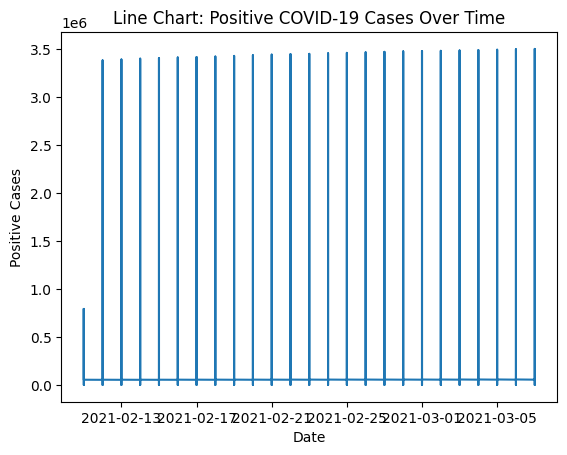

In [3]:
#Line Chart 

import matplotlib.pyplot as plt

plt.plot(df['date'], df['positive'])
plt.title('Line Chart: Positive COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.show()


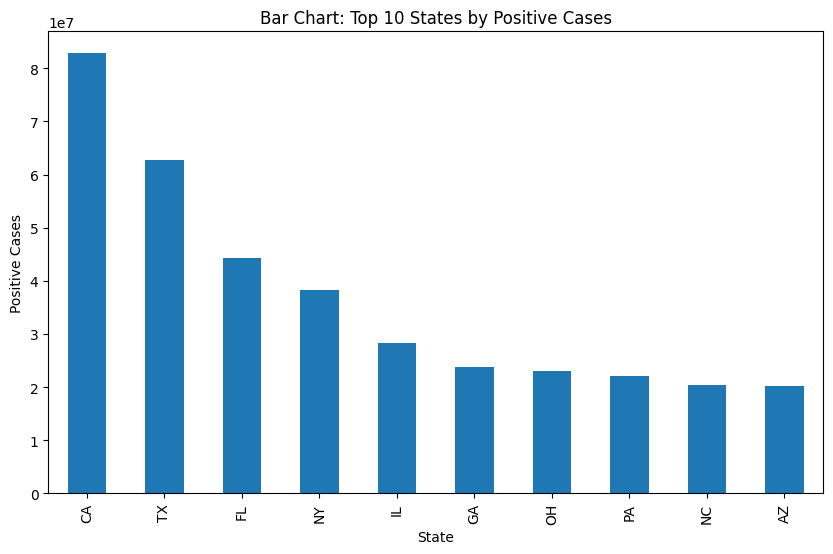

In [4]:
# Bar Chart
df_grouped = df.groupby('state')['positive'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
df_grouped.plot(kind='bar')
plt.title('Bar Chart: Top 10 States by Positive Cases')
plt.xlabel('State')
plt.ylabel('Positive Cases')
plt.show()


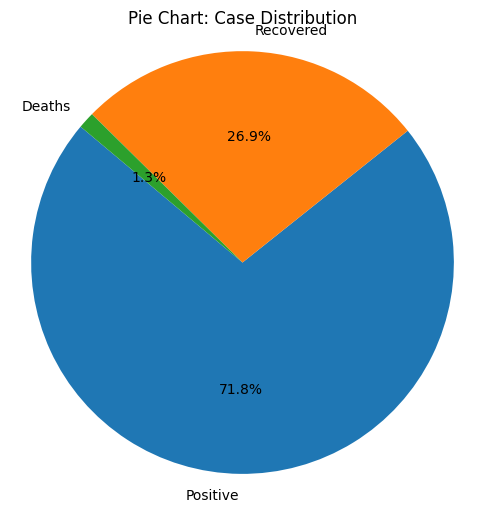

In [5]:
labels = ['Positive', 'Recovered', 'Deaths']
sizes = [df['positive'].sum(), df['recovered'].sum(), df['death'].sum()]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Case Distribution')
plt.axis('equal')
plt.show()


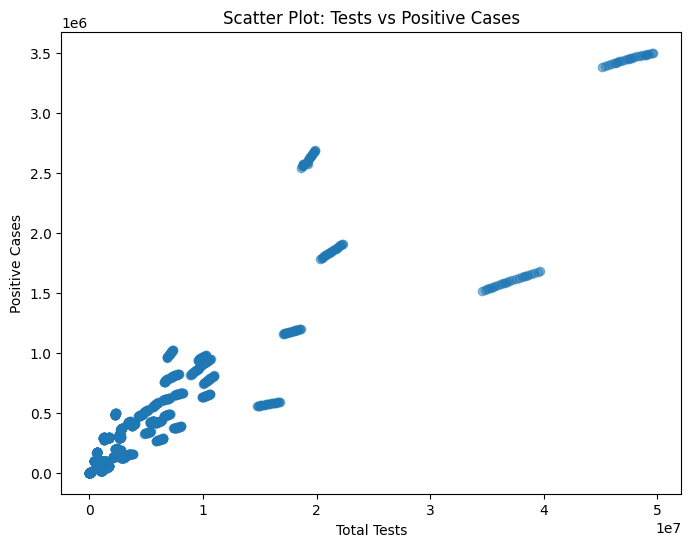

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df['totalTestResults'], df['positive'], alpha=0.5)
plt.title('Scatter Plot: Tests vs Positive Cases')
plt.xlabel('Total Tests')
plt.ylabel('Positive Cases')
plt.show()


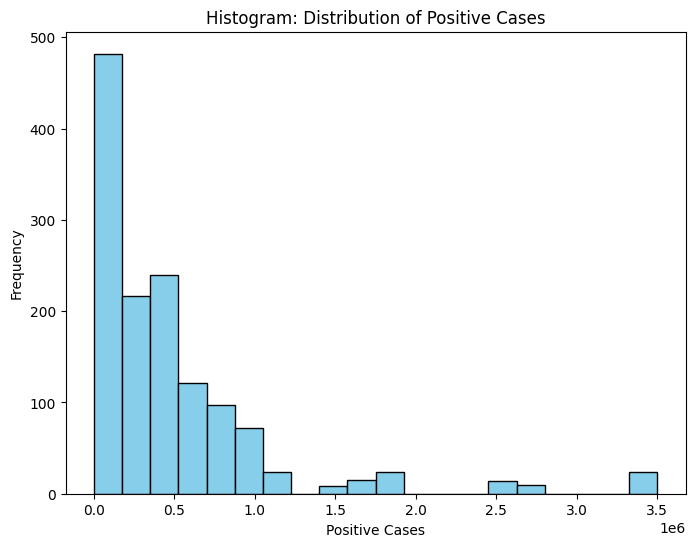

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df['positive'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram: Distribution of Positive Cases')
plt.xlabel('Positive Cases')
plt.ylabel('Frequency')
plt.show()


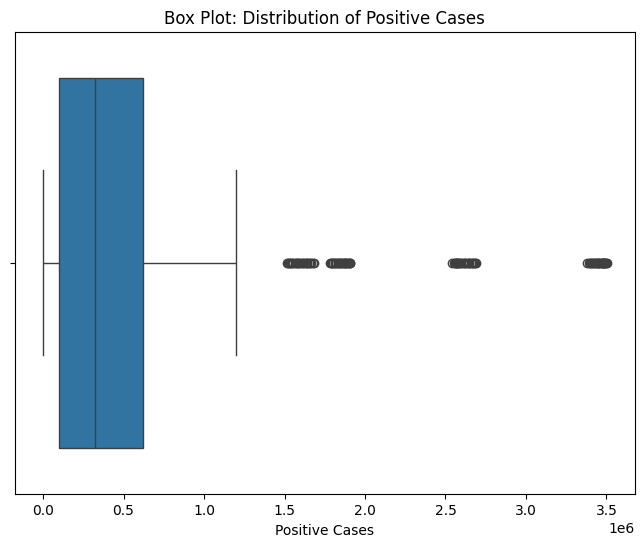

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=df['positive'].dropna())
plt.title('Box Plot: Distribution of Positive Cases')
plt.xlabel('Positive Cases')
plt.show()



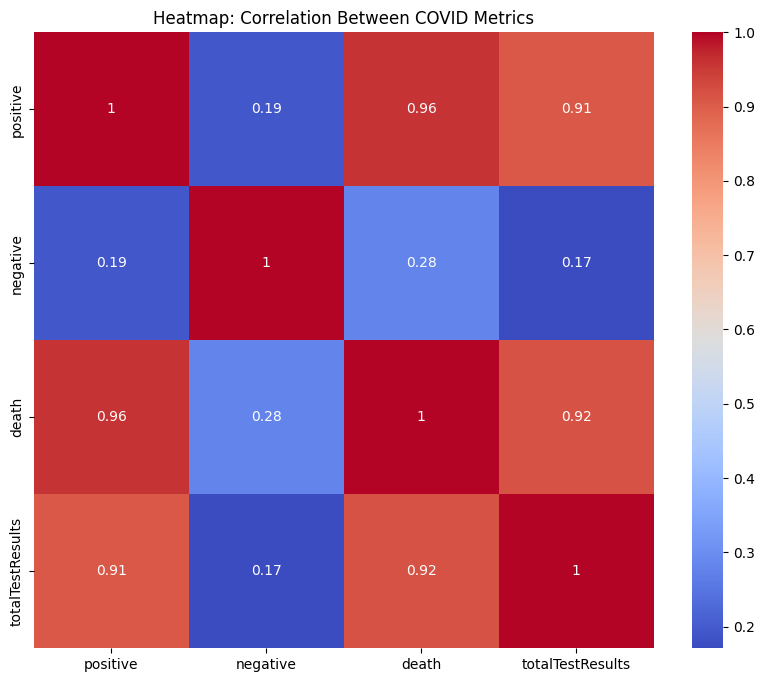

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['positive', 'negative', 'death', 'totalTestResults']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Between COVID Metrics')
plt.show()


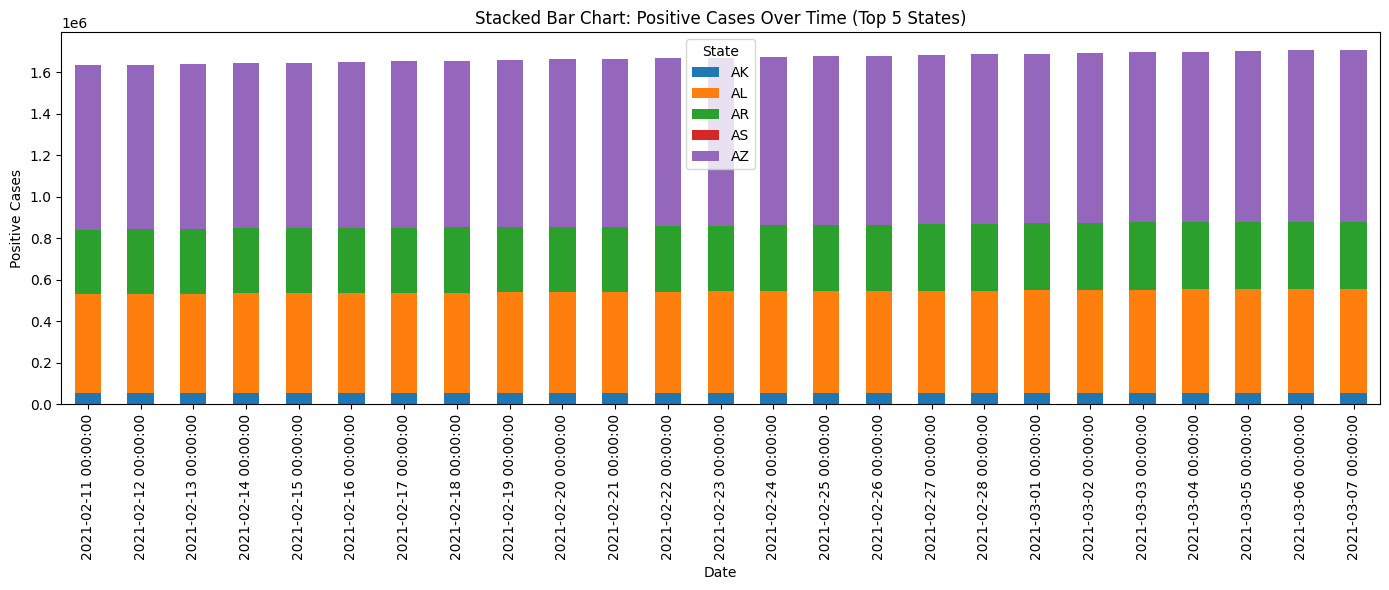

In [12]:
top_states = df['state'].value_counts().index[:5]
subset = df[df['state'].isin(top_states)]

pivot = subset.pivot_table(index='date', columns='state', values='positive', aggfunc='sum').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Stacked Bar Chart: Positive Cases Over Time (Top 5 States)')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.legend(title='State')
plt.tight_layout()
plt.show()


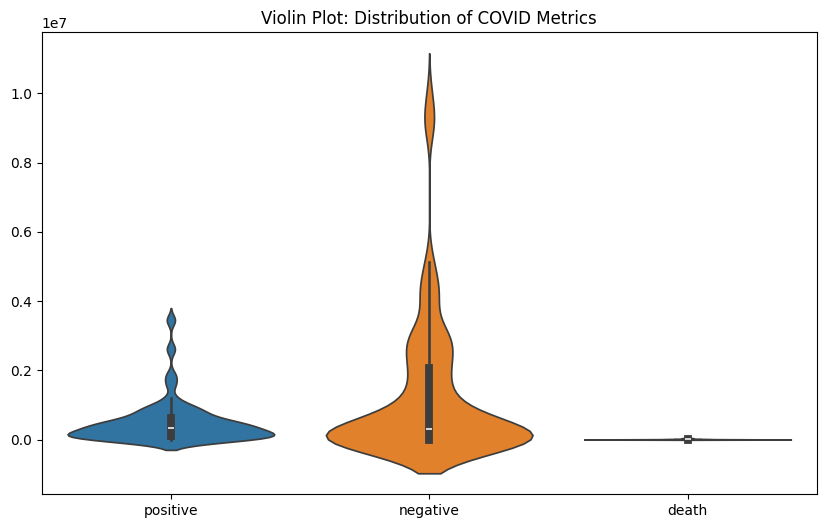

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[['positive', 'negative', 'death']])
plt.title('Violin Plot: Distribution of COVID Metrics')
plt.show()


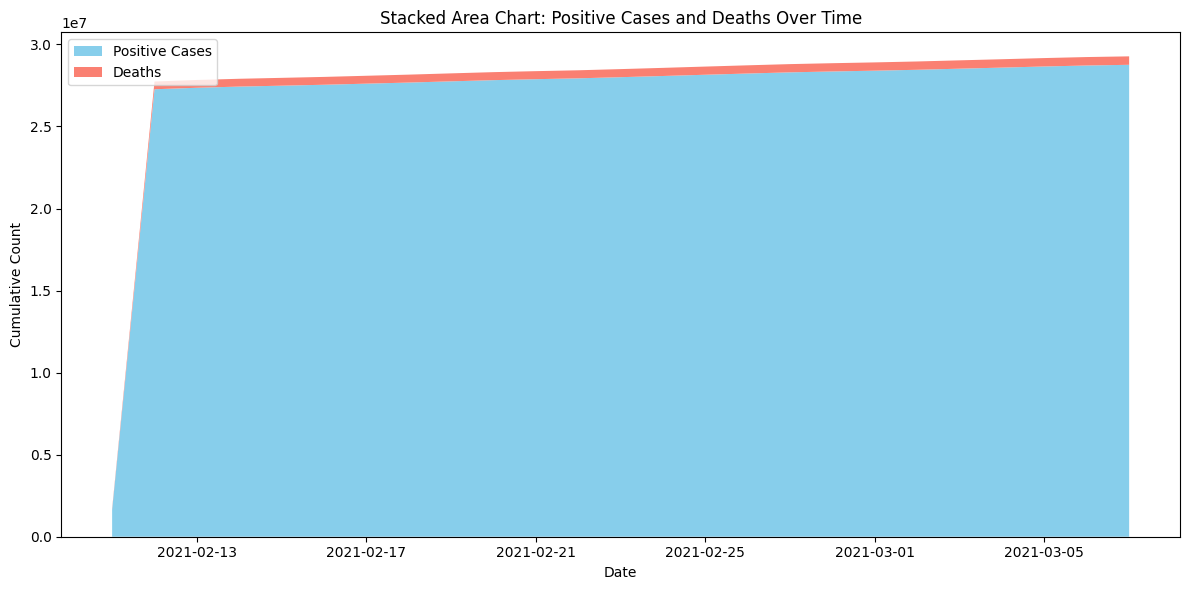

In [14]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values('date')
trend = df_sorted.groupby('date')[['positive', 'death']].sum()

plt.figure(figsize=(12, 6))
plt.stackplot(trend.index, trend['positive'], trend['death'], labels=['Positive Cases', 'Deaths'], colors=['skyblue', 'salmon'])
plt.title('Stacked Area Chart: Positive Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Vicky\AppData\Local\Temp\ipykernel_28244\459349659.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['positive'].dropna(), shade=True, color='purple')


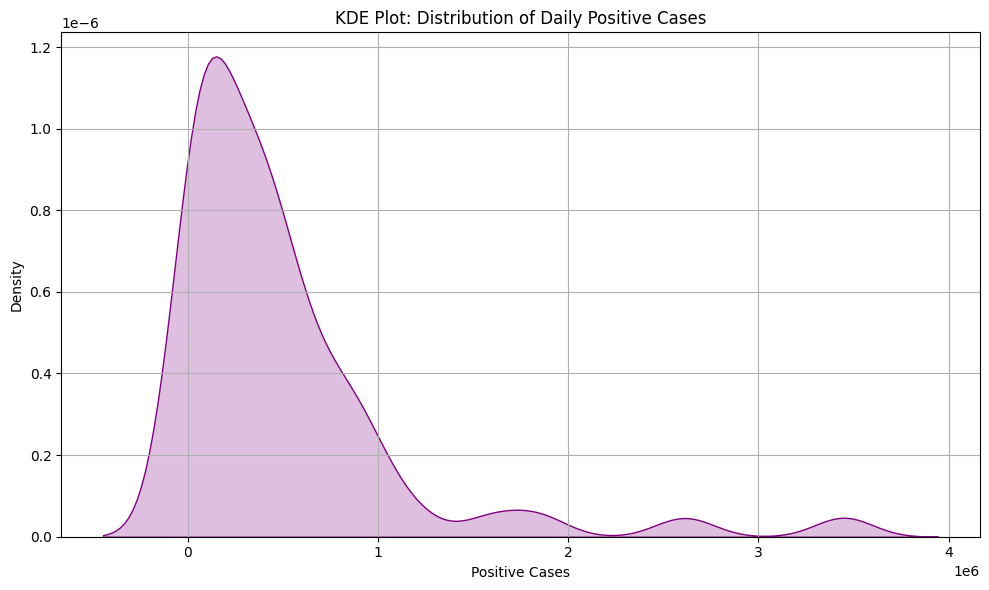

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(df['positive'].dropna(), shade=True, color='purple')
plt.title('KDE Plot: Distribution of Daily Positive Cases')
plt.xlabel('Positive Cases')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()
